In [ ]:
!pip install pymc3

In [5]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Data - Case 1
***

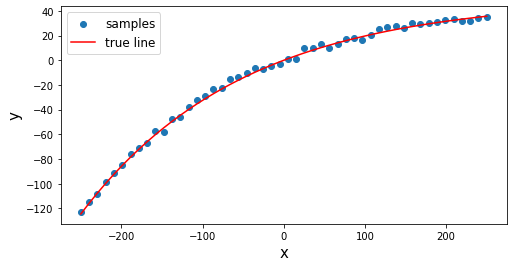

In [29]:
import math
from scipy import special

# known parameters 
a = 50
b = 0
c = 200

# unobserved parameter/ parameter to be estimated
d = 0.5

# Generate toy experimental data
num_points = 50
x_vals = np.linspace(-250, 250, num_points)
C_vals = a - (a-b)*np.exp(-(x_vals/(2*d*c)))
y_vals = C_vals + np.random.normal(scale=2, size=num_points)

plt.figure(figsize=(8,4))
p1 = plt.scatter(x_vals, y_vals)
p2, = plt.plot(x_vals, C_vals, color='r')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend((p1, p2), ('samples', 'true line'), fontsize=12)

# Grid Search Method - Case 1
***

Estimated D value: 0.5


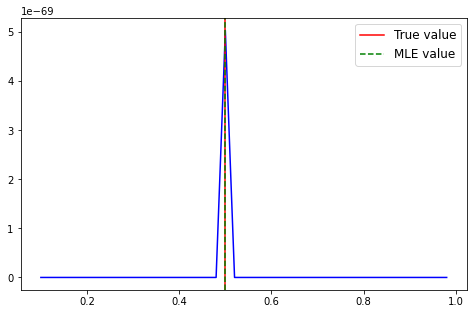

In [30]:
from scipy.stats import multivariate_normal

# grid for the unobserved parameter/ parameter to be estimated
d_vals = np.arange(0.1, 1, 0.02)

# calculate likelihood of observing the experimental data for each point from the grid
likelihood = []
for d_val in d_vals:
  C_vals = a - (a-b)*np.exp(-(x_vals/(2*d_val*c)))
  likelihood.append(multivariate_normal.pdf(y_vals, C_vals, np.identity(num_points)))

# identify MLE for the unobserved parameter/ parameter to be estimated
chosen_idx = likelihood.index(max(likelihood))
MLE = round(d_vals[chosen_idx],4)

plt.figure(figsize=(8,5))
plt.plot(d_vals, likelihood, color='b')
true_D = plt.axvline(d, color='r', linestyle='-')
mle_D = plt.axvline(MLE, color='g', linestyle='--')
plt.legend((true_D, mle_D), ('True value', 'MLE value'), fontsize=12)
print("{}: {}".format('Estimated D value',MLE))

# Bayesian Analysis with PyMC3 - Case 1
***

# Prior:
## $D \sim N(1,0.1)$
***

In [31]:
with pm.Model() as model:
    #priors
    d_gen = pm.LogNormal("d", mu=1, sigma=0.1)

    #Likelihood
    x_vals = np.linspace(-250, 250, num_points)
    likelihood = pm.Normal("C", mu = a - (a-b)*np.exp(-(x_vals/(2*d_gen*c))), sigma=np.ones(num_points), observed=y_vals)

    #posterior
    trace = pm.sample(1000, cores=4)

/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


<Figure size 504x504 with 0 Axes>

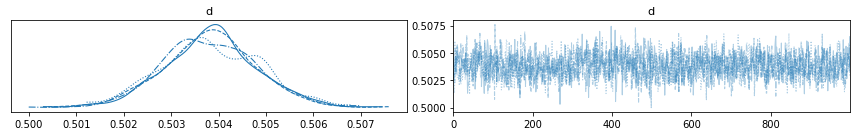

In [32]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


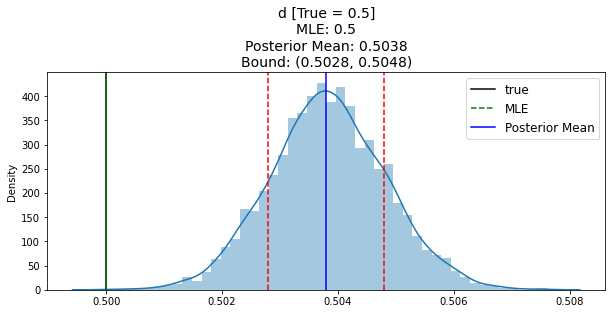

In [33]:
plt.figure(figsize=(10,4))
var = 'd'
vals = trace.get_values(var)
mean, lower, upper = round(vals.mean(),4), round(vals.mean()-vals.std(),4), round(vals.mean()+vals.std(),4)
sns.distplot(vals)
true_val = plt.axvline(d, color='k')
posterior_est = plt.axvline(mean, color='b')
mle_est = plt.axvline(MLE, color='g', linestyle='--')
plt.axvline(lower, color='r', linestyle='--')
plt.axvline(upper, color='r', linestyle='--')
plt.title('%s [True = %s]\nMLE: %s\nPosterior Mean: %s\nBound: (%s, %s)'%(var,d,MLE,mean,lower,upper), fontsize=14)
    
    
plt.legend((true_val, mle_est, posterior_est), ('true', 'MLE', 'Posterior Mean'), fontsize=12)
    
plt.show()

# Generate Data - Case 2
***

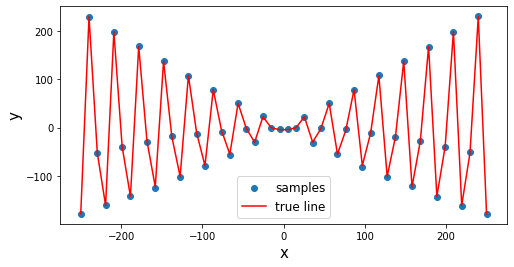

In [34]:
import math
from scipy import special

# unobserved parameter/ parameter to be estimated
true_D = 0.82

# Generate toy experimental data
num_points = 50
x_vals = np.linspace(-250, 250, num_points)
C_vals = x_vals*np.sin(x_vals*true_D)
y_vals = C_vals + np.random.normal(scale=1, size=num_points)

plt.figure(figsize=(8,4))
p1 = plt.scatter(x_vals, y_vals)
p2, = plt.plot(x_vals, C_vals, color='r')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend((p1, p2), ('samples', 'true line'), fontsize=12)

# Grid Search Method - Case 2
***

Estimated D value: 0.82


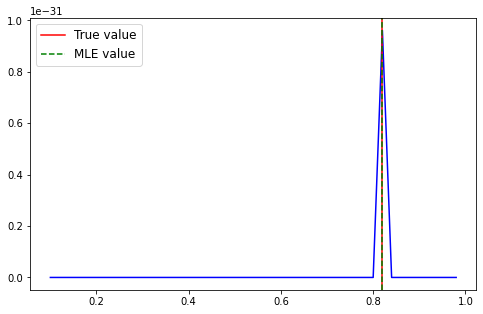

In [35]:
from scipy.stats import multivariate_normal

# grid for the unobserved parameter/ parameter to be estimated
D_vals = np.arange(0.1, 1, 0.02)

# calculate likelihood of observing the experimental data for each point from the grid
likelihood = []
for item in D_vals:
  C_vals = x_vals*np.sin(x_vals*item)
  likelihood.append(multivariate_normal.pdf(y_vals, C_vals, np.identity(num_points)))

# identify MLE for the unobserved parameter/ parameter to be estimated
chosen_idx = likelihood.index(max(likelihood))
MLE = round(D_vals[chosen_idx],4)

plt.figure(figsize=(8,5))
plt.plot(D_vals, likelihood, color='b')
true = plt.axvline(true_D, color='r', linestyle='-')
mle = plt.axvline(MLE, color='g', linestyle='--')
plt.legend((true, mle), ('True value', 'MLE value'), fontsize=12)
print("{}: {}".format('Estimated D value',MLE))

# Bayesian Analysis with PyMC3 - Case 2
***

# Prior:
## $D \sim N(1,0.1)$
***

In [36]:
with pm.Model() as model:
    #priors
    D = pm.LogNormal("D", mu=1, sigma=0.1)

    #Likelihood
    x_vals = np.linspace(-250, 250, num_points)
    # likelihood = pm.Normal("C", mu = Cs - (Cs-C0)*np.exp(x_vals/(2*D*t)), sigma=np.ones(num_points), observed=y_vals)
    likelihood = pm.Normal("C", mu = x_vals*np.sin(x_vals*D), sigma=np.ones(num_points), observed=y_vals)

    #posterior
    trace = pm.sample(1000, cores=4)

/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:pymc3:The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


<Figure size 504x504 with 0 Axes>

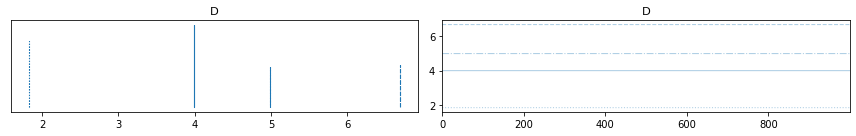

In [37]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


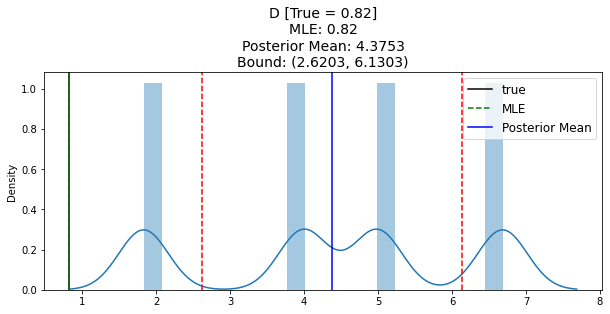

In [38]:
for var in ['D']:
    plt.figure(figsize=(10,4))
    vals = trace.get_values(var)
    mean, lower, upper = round(vals.mean(),4), round(vals.mean()-vals.std(),4), round(vals.mean()+vals.std(),4)
    sns.distplot(vals)
    true_val = plt.axvline(true_D, color='k')
    posterior_est = plt.axvline(mean, color='b')
    mle_est = plt.axvline(MLE, color='g', linestyle='--')
    plt.axvline(lower, color='r', linestyle='--')
    plt.axvline(upper, color='r', linestyle='--')
    plt.title('%s [True = %s]\nMLE: %s\nPosterior Mean: %s\nBound: (%s, %s)'%(var,true_D,MLE,mean,lower,upper), fontsize=14)
    
    
    plt.legend((true_val, mle_est, posterior_est), ('true', 'MLE', 'Posterior Mean'), fontsize=12)
    
    plt.show()